**Importing Libraries**

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

Importing **Dataset**

In [148]:
df_fake=pd.read_csv("/content/Fake.csv")
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [149]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [150]:
df_true = pd.read_csv("/content/True.csv")

In [151]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [152]:
df_fake["class"] = 0
df_true["class"] = 1

In [153]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [154]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [155]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

**Inserting a column "class" as target feature**

In [156]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-156-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-156-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [157]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [158]:
df_true_manual_testing.head(10)


,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


**Merging True and Fake Dataframes**

In [159]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")


In [160]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [161]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

**Removing columns which are not required**

In [162]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [163]:
df.isnull().sum()

,0
text,0
class,0


**Random Shuffling the dataframe**

In [164]:
df = df.sample(frac = 1)

In [165]:
df.head()


,text,class
4608,BRASILIA (Reuters) - Brazilian and U.S. offici...,1
8732,NEW YORK (Reuters) - U.S. presidential hopeful...,1
6654,(Reuters) - The following people are mentioned...,1
5724,NEW YORK (Reuters) - Hundreds of New York City...,1
12938,I wish this was a joke!#BlackLivesMatter prote...,0


In [166]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [167]:
df.columns


Index(['text', 'class'], dtype='object')

In [168]:
df.head()


,text,class
0,BRASILIA (Reuters) - Brazilian and U.S. offici...,1
1,NEW YORK (Reuters) - U.S. presidential hopeful...,1
2,(Reuters) - The following people are mentioned...,1
3,NEW YORK (Reuters) - Hundreds of New York City...,1
4,I wish this was a joke!#BlackLivesMatter prote...,0


Creating a function to process the texts
**bold text**

In [169]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [170]:
df["text"] = df["text"].apply(wordopt)

**Defining dependent and independent variables**

In [171]:
x = df["text"]
y = df["class"]

**Splitting Training and Testing**

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

**Convert text to vectors**

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**Logistic Regression**

In [174]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [175]:
pred_lr=LR.predict(xv_test)


In [176]:
LR.score(xv_test, y_test)

0.9848484848484849

In [177]:
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5876
           1       0.98      0.99      0.98      5344

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



**Decision Tree Classification**

In [178]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [179]:
pred_dt = DT.predict(xv_test)

In [180]:
DT.score(xv_test, y_test)

0.9946524064171123

In [181]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5876
           1       1.00      0.99      0.99      5344

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Gradient Boosting Classifier

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [183]:
pred_gbc = GBC.predict(xv_test)


In [184]:
GBC.score(xv_test, y_test)


0.9959893048128342

In [185]:
print(classification_report(y_test, pred_gbc))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5876
           1       0.99      1.00      1.00      5344

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



**Random Forest Classifier**

In [186]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [187]:
pred_rfc = RFC.predict(xv_test)

In [188]:
RFC.score(xv_test, y_test)

0.988680926916221

In [189]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5344

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Model Testing**

In [190]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [191]:
news = str(input())
manual_testing(news)

"21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have 

In [192]:
news = str(input())
manual_testing(news)

"JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threat

In [193]:
news = str(input())
manual_testing(news)

hi this a real news


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


NOW USING LSTM AND NLP

In [194]:
import nltk
from wordcloud import WordCloud

In [195]:
 from tensorflow.keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 from tensorflow.keras.models import Sequential
 from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [196]:
df_fake.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [197]:
df_fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,768


<Axes: xlabel='subject', ylabel='count'>

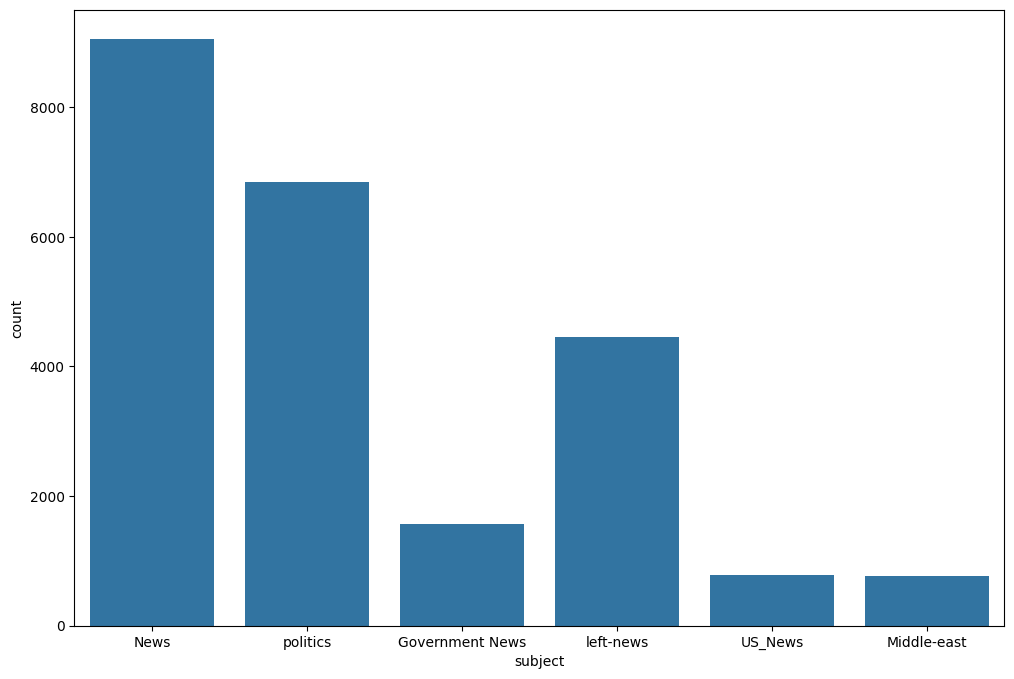

In [198]:
plt.figure(figsize=(12,8))
sns.countplot(x='subject', data=df_fake)


In [199]:
##wordcloud

In [200]:
text=" ".join(df_fake['text'].tolist())

(-0.5, 399.5, 199.5, -0.5)

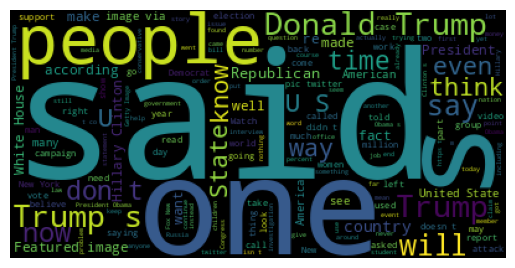

In [201]:
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')

In [202]:
df_true.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [203]:
text=" ".join(df_true['text'].tolist())

(-0.5, 399.5, 199.5, -0.5)

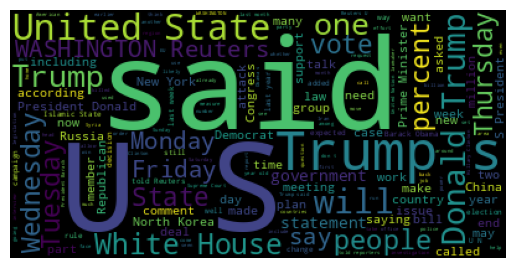

In [204]:
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')

In [205]:
df_true.sample(5)

,title,text,subject,date,class
14654,Youth leader of Zimbabwe's ruling party apolog...,HARARE (Reuters) - The head of the youth wing ...,worldnews,"November 15, 2017",1
8610,Trump draws ire after urging Russia to find 'm...,MIAMI/WASHINGTON (Reuters) - Republican Donald...,politicsNews,"July 27, 2016",1
14821,More than 60 killed in air strike on Syrian ma...,BEIRUT (Reuters) - The death toll from air str...,worldnews,"November 14, 2017",1
20052,Turkey feels betrayed over EU accession but st...,LONDON (Reuters) - Turkey feels betrayed by so...,worldnews,"September 14, 2017",1
8611,Activist Steyer expands agenda in bid to defea...,PHILADELPHIA (Reuters) - Billionaire environme...,politicsNews,"July 27, 2016",1


In [206]:
# Concatenate the two datasets
data = pd.concat([df_fake[['text', 'class']], df_true[['text', 'class']]], axis=0)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

In [207]:
data = data.sample(frac=1).reset_index(drop=True)

In [208]:
# Preprocess the text data
def preprocess_text(text):
    # Remove any unwanted characters, lowercasing, etc. (basic preprocessing)
    text = text.lower()
    return text


In [209]:
data['text'] = data['text'].apply(preprocess_text)

In [210]:
# Split data into training and testing sets
X = data['text']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [211]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [212]:
# Pad sequences to ensure uniform input size
max_len = 100  # You can adjust this based on your dataset
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=max_len)


In [213]:
# Build the LSTM model
model = Sequential()

In [214]:
# Add an embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [215]:
# Add an LSTM layer
model.add(LSTM(128, return_sequences=False))

# Add a dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Add a dense layer for classification
model.add(Dense(1, activation='sigmoid'))

In [216]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [217]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Epoch 1/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 206s 361ms/step - accuracy: 0.9206 - loss: 0.2259 - val_accuracy: 0.9823 - val_loss: 0.0596
Epoch 2/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 264s 364ms/step - accuracy: 0.9780 - loss: 0.0720 - val_accuracy: 0.9667 - val_loss: 0.1302
Epoch 3/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 253s 349ms/step - accuracy: 0.9742 - loss: 0.0728 - val_accuracy: 0.9857 - val_loss: 0.0461
Epoch 4/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 165s 283ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9894 - val_loss: 0.0376
Epoch 5/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 203s 284ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9890 - val_loss: 0.0406


In [218]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


281/281 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.9891 - loss: 0.0391
Test Accuracy: 98.90%


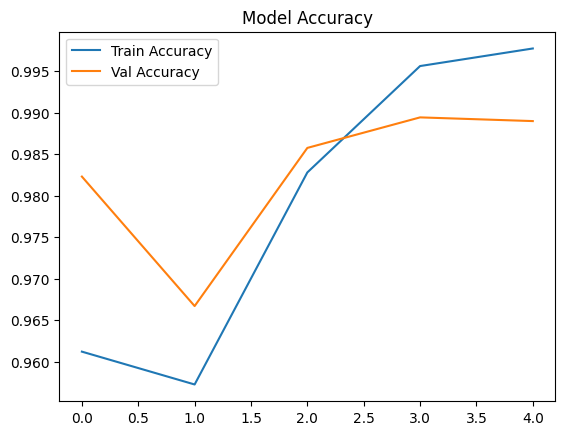

In [219]:
# Plot training history (accuracy and loss)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


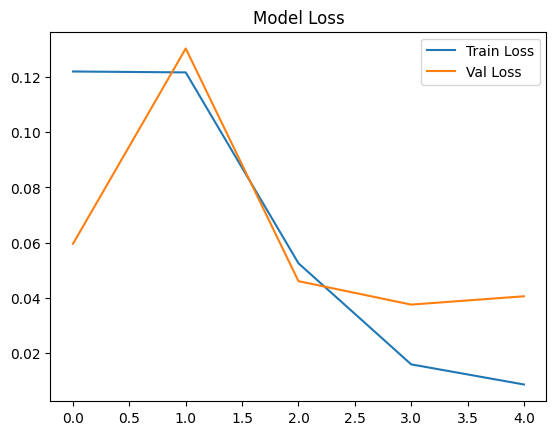

In [220]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [236]:
import joblib


In [237]:
# Save the trained model and tokenizer
joblib.dump(model, 'fake_news_lstm_model.pkl')
joblib.dump(tokenizer, 'fake_news_tokenizer.pkl')

['fake_news_tokenizer.pkl']

In [254]:
# Preprocess the text
def preprocess_text(text):
  return text.lower()  # Convert text to lowercase

data['text'] = data['text'].apply(preprocess_text)

In [266]:
# Function to predict whether a news article is fake or real
def predict_news(news_text):
    # Preprocess the input text
  news_text = preprocess_text(news_text)
  # Convert text to sequence and pad
  news_seq = tokenizer.texts_to_sequences([news_text])
  news_pad= pad_sequences(news_seq, maxlen=max_len, padding='post')
    # Load the trained model
  model = joblib.load('fake_news_lstm_model.pkl')
   # Make prediction (1 = real, 0 = fake)
  prediction = model.predict(news_pad)
  return "Fake News" if prediction > 0 else "Real News"

In [267]:
# Example usage: Predict fake or real for a given news article
news_input = str(input())
print(predict_news(news_input))

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Fake News
